**Assignment Title: Lab Assignment 4 - Text Classification with Deep Learning**

**Author name: Garima Astha**

**ASU ID: 1234333687 (gastha)**

**file creation date: 23 Feb 2025**

**Objectives**
In this lab assignment, you will use some deep learning models via TFKeras to quantify sentiments on the Yelp Review data and compare their performance.

**Import libraries and dataset, Display summary of dataset**

Remove 3-star reviews from the input data and create a new column - Sentiment for the remaining reviews. For reviews with 1 or 2 star ratings, set the value in the Sentiment column to 0.

For reviews with 4 or 5-star ratings, set the value in the sentiment column to 1.

Conduct necessary data processing. Prepare the training and test sets on review data for machine learning classifications. 20% of the data is for testing, and 80% of the data is for training.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Importing the restaurant review data
file_path = r'/content/sample_data/restaurant_reviews_az.csv'
df = pd.read_csv(file_path)

# Show a summary of the input data
print("Data Summary:")
print(df.describe())
print("\nData Information:")
print(df.info())

# Remove 3-star reviews from the data
df_filtered = df[df['stars'] != 3]

# Create a new column 'Sentiment'
df_filtered['Sentiment'] = df_filtered['stars'].apply(lambda x: 0 if x in [1, 2] else 1)

# Show the updated dataframe with Sentiment column
print("\nData after processing and adding Sentiment column:")
print(df_filtered.head())

# Prepare the training and testing sets
X = df_filtered[['user_id', 'business_id', 'useful', 'funny', 'cool', 'text', 'date']]  # Features
y = df_filtered['Sentiment']  # Target variable

# Since 'text' and 'date' columns are non-numeric, you need to process them before model training
# This step assumes you want to apply basic preprocessing, but a full analysis of text data would require more steps.
# For simplicity, we will drop non-numeric columns for now.
X = X.drop(columns=['text', 'date'])

# Split the dataset into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show the shape of the resulting data splits
print("\nTraining and Testing data splits:")
print(f"Training data shape: {X_train.shape}, Testing data shape: {X_test.shape}")


Data Summary:
              stars        useful         funny          cool
count  48147.000000  48147.000000  48147.000000  48147.000000
mean       3.736702      0.858683      0.183106      0.439903
std        1.557289      1.831488      0.807035      1.451746
min        1.000000      0.000000      0.000000      0.000000
25%        2.000000      0.000000      0.000000      0.000000
50%        5.000000      0.000000      0.000000      0.000000
75%        5.000000      1.000000      0.000000      0.000000
max        5.000000    105.000000     55.000000    106.000000

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48147 entries, 0 to 48146
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_id    48147 non-null  object
 1   user_id      48147 non-null  object
 2   business_id  48147 non-null  object
 3   stars        48147 non-null  int64 
 4   useful       48147 non-null  int64 
 5   funny    

<ipython-input-3-47ab6d5cc0d5>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Sentiment'] = df_filtered['stars'].apply(lambda x: 0 if x in [1, 2] else 1)


**Download the pre-trained GloVe word embeddings (glove.6B.100d.txt) and prepare the embedding matrix for this review dataset.**



In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import urllib.request
import os

# Step 1: Download the pre-trained GloVe embeddings (if not already downloaded)
glove_url = 'http://nlp.stanford.edu/data/glove.6B.zip'
glove_zip_path = 'glove.6B.zip'
glove_folder_path = 'glove.6B'

# Check if the file is already downloaded
if not os.path.exists(glove_folder_path):
    print("Downloading GloVe embeddings...")
    urllib.request.urlretrieve(glove_url, glove_zip_path)

    # Unzip the file
    import zipfile
    with zipfile.ZipFile(glove_zip_path, 'r') as zip_ref:
        zip_ref.extractall(glove_folder_path)
    print("GloVe embeddings downloaded and extracted.")

# Step 2: Load the GloVe word vectors (100-dimensional)
glove_file_path = os.path.join(glove_folder_path, 'glove.6B.100d.txt')

# Load the word vectors into a dictionary
embeddings_index = {}
with open(glove_file_path, 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        embedding = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = embedding
print(f"Loaded {len(embeddings_index)} word vectors.")

# Step 3: Preprocess the review text (tokenize and clean)
# Assuming df is your DataFrame containing the review data
texts = df['text'].values

# Initialize the tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)

# Convert the texts to sequences of integers
sequences = tokenizer.texts_to_sequences(texts)

# Pad sequences to ens


GloVe embeddings downloaded and extracted.
Loaded 400000 word vectors.


**Build a GRU model with pre-trained GloVe embedding and show model performance**



<ipython-input-6-4d82a7729731>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Sentiment'] = df_filtered['stars'].apply(lambda x: 0 if x in [1, 2] else 1)


Loaded 400000 word vectors.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
552/552 ━━━━━━━━━━━━━━━━━━━━ 737s 1s/step - accuracy: 0.8223 - loss: 0.3855 - val_accuracy: 0.9388 - val_loss: 0.1602
Epoch 2/10
552/552 ━━━━━━━━━━━━━━━━━━━━ 738s 1s/step - accuracy: 0.9393 - loss: 0.1543 - val_accuracy: 0.9367 - val_loss: 0.1626
Epoch 3/10
552/552 ━━━━━━━━━━━━━━━━━━━━ 766s 1s/step - accuracy: 0.9499 - loss: 0.1329 - val_accuracy: 0.9509 - val_loss: 0.1195
Epoch 4/10
552/552 ━━━━━━━━━━━━━━━━━━━━ 790s 1s/step - accuracy: 0.9591 - loss: 0.1084 - val_accuracy: 0.9514 - val_loss: 0.1274
Epoch 5/10
552/552 ━━━━━━━━━━━━━━━━━━━━ 756s 1s/step - accuracy: 0.9624 - loss: 0.0976 - val_accuracy: 0.9552 - val_loss: 0.1149
Epoch 6/10
552/552 ━━━━━━━━━━━━━━━━━━━━ 807s 1s/step - accuracy: 0.9711 - loss: 0.0778 - val_accuracy: 0.9550 - val_loss: 0.1153
Epoch 7/10
552/552 ━━━━━━━━━━━━━━━━━━━━ 796s 1s/step - accuracy: 0.9674 - loss: 0.0921 - val_accuracy: 0.9570 - val_loss: 0.1207
Epoch 8/10
552/552 ━━━━━━━━━━━━━━━━━━━━ 812s 1s/step - accuracy: 0.9796 - loss: 0.0572 - val_accu

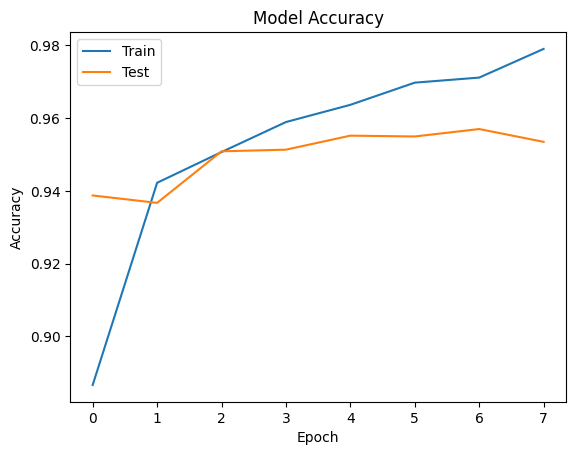

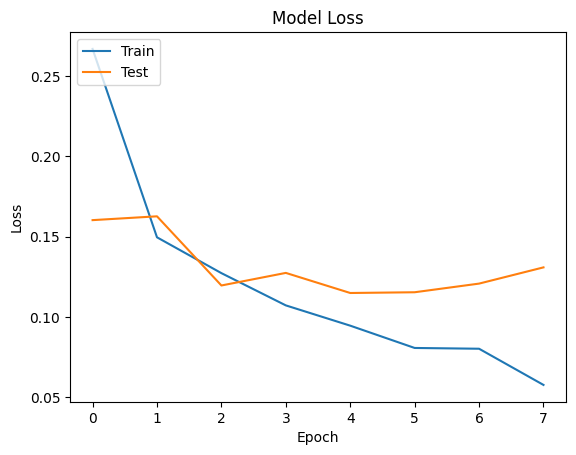

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
import os
import urllib.request
import zipfile
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Step 1: Prepare the data (assuming df is already loaded)
# Assuming 'text' column for review text and 'Sentiment' for sentiment labels
# Example: df = pd.read_csv('your_file.csv')

# Load the dataframe
file_path = r'/content/sample_data/restaurant_reviews_az.csv'
df = pd.read_csv(file_path)

# Remove 3-star reviews from the data
df_filtered = df[df['stars'] != 3]

# Create a new column 'Sentiment'
df_filtered['Sentiment'] = df_filtered['stars'].apply(lambda x: 0 if x in [1, 2] else 1)

# Let's preprocess the 'text' data
texts = df_filtered['text'].values  # Get the text column

# Initialize the tokenizer and fit it on the texts
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)

# Convert the texts to sequences of integers
X_text = tokenizer.texts_to_sequences(texts)

# Pad sequences to ensure uniform length
max_length = max([len(seq) for seq in X_text])  # You can set a custom max_length
X_text = pad_sequences(X_text, maxlen=max_length)

# Prepare the target labels (sentiment labels)
y = df_filtered['Sentiment'].values  # Assuming 'Sentiment' column has 0 and 1 labels

# Step 2: Load pre-trained GloVe embeddings (if not already loaded)
glove_url = 'http://nlp.stanford.edu/data/glove.6B.zip'
glove_zip_path = 'glove.6B.zip'
glove_folder_path = 'glove.6B'

# Check if the GloVe file is already downloaded and extracted
if not os.path.exists(glove_folder_path):
    print("Downloading GloVe embeddings...")
    urllib.request.urlretrieve(glove_url, glove_zip_path)

    # Unzip the file
    with zipfile.ZipFile(glove_zip_path, 'r') as zip_ref:
        zip_ref.extractall(glove_folder_path)
    print("GloVe embeddings downloaded and extracted.")

# Load the GloVe word vectors (100-dimensional)
glove_file_path = os.path.join(glove_folder_path, 'glove.6B.100d.txt')

# Load the word vectors into a dictionary
embeddings_index = {}
with open(glove_file_path, 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        embedding = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = embedding
print(f"Loaded {len(embeddings_index)} word vectors.")

# Step 3: Prepare the embedding matrix
embedding_dim = 100  # GloVe 100-dimensional embeddings
word_index = tokenizer.word_index

# Initialize the embedding matrix with zeros
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))

# Loop through the words in the tokenizer and build the embedding matrix
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_text, y, test_size=0.2, random_state=42)

# Step 5: Build the GRU model
model = Sequential()

# Add the GloVe embedding layer with pre-trained embeddings
model.add(Embedding(input_dim=len(word_index) + 1,
                    output_dim=embedding_dim,
                    weights=[embedding_matrix],  # pre-trained GloVe embeddings
                    input_length=X_train.shape[1],  # maximum sequence length
                    trainable=False))  # Keep embeddings frozen

# Add the GRU layer
model.add(GRU(units=128, return_sequences=False))  # 128 units in GRU layer

# Add a Dropout layer for regularization
model.add(Dropout(0.2))

# Add a Dense output layer with sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Step 6: Compile the model
model.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

# Step 7: Train the model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping])

# Step 8: Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy}")

# Step 9: Plot the training history (accuracy and loss over epochs)
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

**Build an LSTM model with pre-trained GloVe embedding and show model performance**



Loaded 400000 word vectors.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │       3,342,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,342,000 (12.75 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 3,342,000 (12.75 MB)

Epoch 1/5
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 175s 156ms/step - accuracy: 0.8467 - loss: 0.3465 - val_accuracy: 0.9294 - val_loss: 0.1826
Epoch 2/5
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 173s 157ms/step - accuracy: 0.9343 - loss: 0.1705 - val_accuracy: 0.9436 - val_loss: 0.1480
Epoch 3/5
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 172s 156ms/step - accuracy: 0.9485 - loss: 0.1368 - val_accuracy: 0.9443 - val_loss: 0.1428
Epoch 4/5
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 216s 168ms/step - accuracy: 0.9538 - loss: 0.1229 - val_accuracy: 0.9460 - val_loss: 0.1368
Epoch 5/5
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 213s 178ms/step - accuracy: 0.9601 - loss: 0.1044 - val_accuracy: 0.9491 - val_loss: 0.1420
276/276 ━━━━━━━━━━━━━━━━━━━━ 13s 47ms/step - accuracy: 0.9481 - loss: 0.1398
Test Loss: 0.14202551543712616
Test Accuracy: 0.9490872025489807


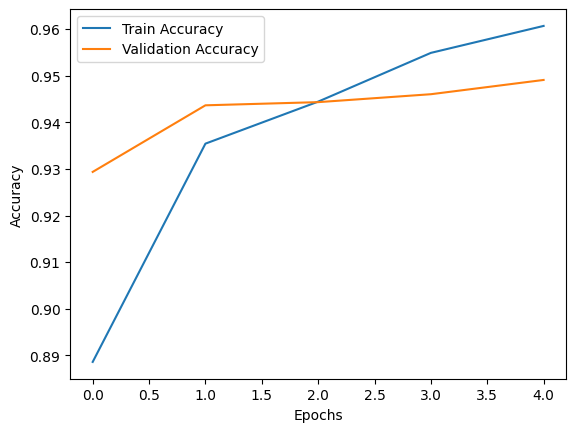

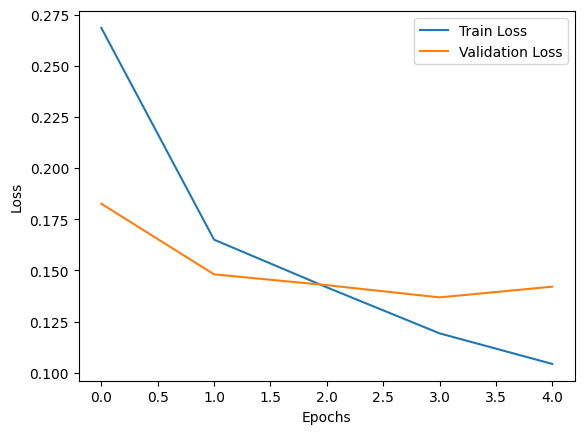

In [ ]:
import numpy as np
import pandas as pd
import urllib.request
import zipfile
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Step 1: Load the review dataset
# Importing the restaurant review data
file_path = r'/content/sample_data/restaurant_reviews_az.csv'
df = pd.read_csv(file_path)

# Step 2: Remove 3-star reviews and create Sentiment column
df = df[df['stars'] != 3]  # Remove 3-star reviews
df['Sentiment'] = df['stars'].apply(lambda x: 0 if x in [1, 2] else 1)  # 0 for negative, 1 for positive



# Step 3: Prepare the training and test sets
X = df['text'].values  # Review text
y = df['Sentiment'].values  # Sentiment labels (0 or 1)

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Tokenize and pad the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Set a maximum sequence length
max_sequence_length = 100

# Pad the sequences to ensure uniform length
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length)

# Step 5: Download and load pre-trained GloVe embeddings
glove_url = 'http://nlp.stanford.edu/data/glove.6B.zip'
glove_zip_path = 'glove.6B.zip'
glove_folder_path = 'glove.6B'

# Check if the GloVe file is already downloaded and extracted
if not os.path.exists(glove_folder_path):
    print("Downloading GloVe embeddings...")
    urllib.request.urlretrieve(glove_url, glove_zip_path)

    # Unzip the file
    with zipfile.ZipFile(glove_zip_path, 'r') as zip_ref:
        zip_ref.extractall(glove_folder_path)
    print("GloVe embeddings downloaded and extracted.")

# Load the GloVe word vectors (100-dimensional)
glove_file_path = os.path.join(glove_folder_path, 'glove.6B.100d.txt')

# Load the word vectors into a dictionary
embeddings_index = {}
with open(glove_file_path, 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        embedding = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = embedding
print(f"Loaded {len(embeddings_index)} word vectors.")

# Step 6: Prepare the embedding matrix
embedding_dim = 100  # We are using glove.6B.100d.txt embeddings
vocab_size = len(tokenizer.word_index) + 1  # Including padding token

embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in tokenizer.word_index.items():
    if word in embeddings_index:
        embedding_matrix[i] = embeddings_index[word]

# Step 7: Build the LSTM model with pre-trained GloVe embedding
model = Sequential()
model.add(Embedding(input_dim=vocab_size,
                    output_dim=embedding_dim,
                    weights=[embedding_matrix],
                    input_length=max_sequence_length,
                    trainable=False))  # Set to False to freeze the GloVe embeddings
model.add(LSTM(128, return_sequences=True))  # LSTM layer with 128 units
model.add(Dropout(0.2))  # Dropout for regularization
model.add(LSTM(64))  # Another LSTM layer with 64 units
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Show the model summary
model.summary()

# Step 8: Train the LSTM model
history = model.fit(X_train_padded, y_train, epochs=5, batch_size=32, validation_data=(X_test_padded, y_test))

# Step 9: Evaluate the model performance
test_loss, test_accuracy = model.evaluate(X_test_padded, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Step 10: Optional - Plot training history
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


**Build a GRU model with trainable GloVe embeddings and show model performance**




Data After Removing 3-Star Reviews and Creating Sentiment Column:
                review_id                 user_id             business_id  \
1  QP2pSzSqpJTMWOCuUuyXkQ  JBLWSXBTKFvJYYiM-FnCOQ  3w7NRntdQ9h0KwDsksIt5Q   
2  oK0cGYStgDOusZKz9B1qug  2_9fKnXChUjC5xArfF8BLg  OMnPtRGmbY8qH_wIILfYKA   
3  E_ABvFCNVLbfOgRg3Pv1KQ  9MExTQ76GSKhxSWnTS901g  V9XlikTxq0My4gE8LULsjw   
4  Rd222CrrnXkXukR2iWj69g  LPxuausjvDN88uPr-Q4cQA  CA5BOxKRDPGJgdUQ8OUOpw   
5  kx6O_lyLzUnA7Xip5wh2NA  YsINprB2G1DM8qG1hbrPUg  rViAhfKLKmwbhTKROM9m0w   

   stars  useful  funny  cool  \
1      5       1      1     1   
2      5       1      0     0   
3      5       0      0     0   
4      4       1      0     0   
5      1       0      0     0   

                                                text                 date  \
1  Pandemic pit stop to have an ice cream.... onl...  2020-04-19 05:33:16   
2  I was lucky enough to go to the soft opening a...  2020-02-29 19:43:44   
3  I've gone to claim Jumpers all over th

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ ?                           │       3,342,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,342,000 (12.75 MB)

 Trainable params: 3,342,000 (12.75 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 183s 162ms/step - accuracy: 0.8834 - loss: 0.2650 - val_accuracy: 0.9540 - val_loss: 0.1171
Epoch 2/5
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 204s 164ms/step - accuracy: 0.9705 - loss: 0.0811 - val_accuracy: 0.9528 - val_loss: 0.1158
Epoch 3/5
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 192s 155ms/step - accuracy: 0.9845 - loss: 0.0452 - val_accuracy: 0.9573 - val_loss: 0.1361
Epoch 4/5
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 171s 155ms/step - accuracy: 0.9940 - loss: 0.0193 - val_accuracy: 0.9544 - val_loss: 0.1877
Epoch 5/5
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 205s 158ms/step - accuracy: 0.9964 - loss: 0.0114 - val_accuracy: 0.9507 - val_loss: 0.2254
276/276 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.9491 - loss: 0.2347
Test Loss: 0.22543437778949738
Test Accuracy: 0.9506746530532837


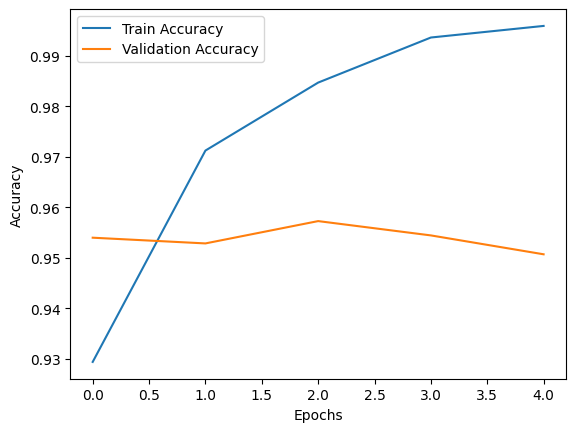

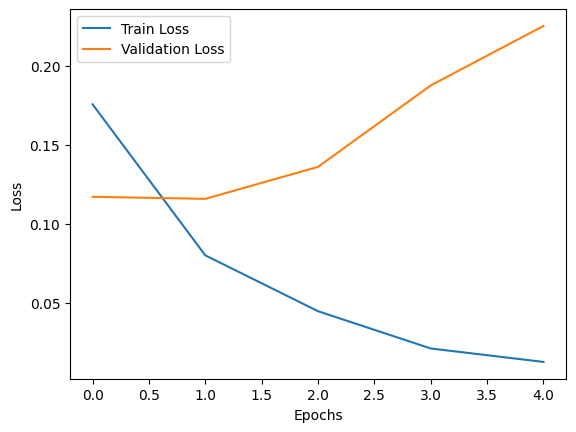

In [ ]:
import numpy as np
import pandas as pd
import urllib.request
import zipfile
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Step 1: Load the review dataset
# Replace this with the actual path to your CSV file
file_path = r'/content/sample_data/restaurant_reviews_az.csv'
df = pd.read_csv(file_path)


# Step 2: Remove 3-star reviews and create Sentiment column
df = df[df['stars'] != 3]  # Remove 3-star reviews
df['Sentiment'] = df['stars'].apply(lambda x: 0 if x in [1, 2] else 1)  # 0 for negative, 1 for positive

# Show the first few rows of the data after processing
print("Data After Removing 3-Star Reviews and Creating Sentiment Column:")
print(df.head())

# Step 3: Prepare the training and test sets
X = df['text'].values  # Review text
y = df['Sentiment'].values  # Sentiment labels (0 or 1)

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Tokenize and pad the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Set a maximum sequence length
max_sequence_length = 100

# Pad the sequences to ensure uniform length
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length)

# Step 5: Download and load pre-trained GloVe embeddings
glove_url = 'http://nlp.stanford.edu/data/glove.6B.zip'
glove_zip_path = 'glove.6B.zip'
glove_folder_path = 'glove.6B'

# Check if the GloVe file is already downloaded and extracted
if not os.path.exists(glove_folder_path):
    print("Downloading GloVe embeddings...")
    urllib.request.urlretrieve(glove_url, glove_zip_path)

    # Unzip the file
    with zipfile.ZipFile(glove_zip_path, 'r') as zip_ref:
        zip_ref.extractall(glove_folder_path)
    print("GloVe embeddings downloaded and extracted.")

# Load the GloVe word vectors (100-dimensional)
glove_file_path = os.path.join(glove_folder_path, 'glove.6B.100d.txt')

# Load the word vectors into a dictionary
embeddings_index = {}
with open(glove_file_path, 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        embedding = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = embedding
print(f"Loaded {len(embeddings_index)} word vectors.")

# Step 6: Prepare the embedding matrix
embedding_dim = 100  # We are using glove.6B.100d.txt embeddings
vocab_size = len(tokenizer.word_index) + 1  # Including padding token

embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in tokenizer.word_index.items():
    if word in embeddings_index:
        embedding_matrix[i] = embeddings_index[word]

# Step 7: Build the GRU model with trainable GloVe embeddings
model = Sequential()
model.add(Embedding(input_dim=vocab_size,
                    output_dim=embedding_dim,
                    weights=[embedding_matrix],
                    input_length=max_sequence_length,
                    trainable=True))  # Set to True to fine-tune the embeddings during training
model.add(GRU(128, return_sequences=True))  # GRU layer with 128 units
model.add(Dropout(0.2))  # Dropout for regularization
model.add(GRU(64))  # Another GRU layer with 64 units
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Show the model summary
model.summary()

# Step 8: Train the GRU model
history = model.fit(X_train_padded, y_train, epochs=5, batch_size=32, validation_data=(X_test_padded, y_test))

# Step 9: Evaluate the model performance
test_loss, test_accuracy = model.evaluate(X_test_padded, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Step 10: Optional - Plot training history
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


**Build an LSTM model with trainable GloVe embeddings and show model performance**




In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
import os
from google.colab import files

# Upload GloVe embeddings file (if running on Google Colab)
uploaded = files.upload()  # This allows you to upload the 'glove.6B.100d.txt' file

# 1. Show the summary of the input data and import necessary libraries
file_path = r'/content/sample_data/restaurant_reviews_az.csv'
data = pd.read_csv(file_path)

# 2. Remove 3-star reviews and create a 'Sentiment' column
data = data[data['stars'] != 3]
data['Sentiment'] = data['stars'].apply(lambda x: 0 if x < 3 else 1)

# 3. Prepare the review data for machine learning classification
X = data['text'].values  # review text
y = data['Sentiment'].values  # sentiment labels

# Train-test split: 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Text preprocessing for LSTM model
# Initialize tokenizer and fit on the training data
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)

# Convert text to sequences and pad them
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_sequence_length = 200  # Maximum length of sequences
X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_length)

# 5. Download GloVe embeddings (glove.6B.100d.txt) and prepare the embedding matrix
# Check if the GloVe file is uploaded or exists in the correct path
embedding_index = {}
glove_file_path = '/content/glove.6B.100d.txt'  # Make sure this path matches the uploaded file

if not os.path.exists(glove_file_path):
    print(f"Error: The GloVe file was not found at {glove_file_path}. Please make sure it's placed correctly.")
else:
    with open(glove_file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embedding_index[word] = coefs

    # Prepare the embedding matrix for the tokenizer
    embedding_dim = 100
    embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, embedding_dim))
    for word, i in tokenizer.word_index.items():
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

    # 6. Build an LSTM model with trainable GloVe embeddings
    model = Sequential()
    model.add(Embedding(len(tokenizer.word_index) + 1, embedding_dim, weights=[embedding_matrix], input_length=max_sequence_length, trainable=True))
    model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

    # 7. Train the model
    model.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test))

    # 8. Evaluate the model
    loss, accuracy = model.evaluate(X_test_pad, y_test)
    print(f'Model Accuracy: {accuracy * 100:.2f}%')


Saving glove.6B.100d.txt to glove.6B.100d (2).txt


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
552/552 ━━━━━━━━━━━━━━━━━━━━ 301s 534ms/step - accuracy: 0.8289 - loss: 0.3807 - val_accuracy: 0.9525 - val_loss: 0.1278
Epoch 2/5
552/552 ━━━━━━━━━━━━━━━━━━━━ 329s 547ms/step - accuracy: 0.9551 - loss: 0.1218 - val_accuracy: 0.9568 - val_loss: 0.1096
Epoch 3/5
552/552 ━━━━━━━━━━━━━━━━━━━━ 313s 530ms/step - accuracy: 0.9678 - loss: 0.0882 - val_accuracy: 0.9609 - val_loss: 0.1069
Epoch 4/5
552/552 ━━━━━━━━━━━━━━━━━━━━ 332s 549ms/step - accuracy: 0.9762 - loss: 0.0665 - val_accuracy: 0.9634 - val_loss: 0.1069
Epoch 5/5
552/552 ━━━━━━━━━━━━━━━━━━━━ 322s 549ms/step - accuracy: 0.9820 - loss: 0.0499 - val_accuracy: 0.9626 - val_loss: 0.1223
276/276 ━━━━━━━━━━━━━━━━━━━━ 22s 79ms/step - accuracy: 0.9611 - loss: 0.1207
Model Accuracy: 96.26%


**Use your best model in your Lab assignment 2 and show the performance**




In [ ]:
# Step 1: Import necessary libraries
!pip install vaderSentiment
import pandas as pd
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score, classification_report

# Import necessary libraries
from sklearn.model_selection import train_test_split

# Assume the dataset `data` has been processed and the 'Sentiment' column exists
# Define the features (X) and the target (y)
X = data['text']  # Features: the review text
y = data['Sentiment']  # Target: the sentiment (0 or 1)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

file_path = r'/content/sample_data/restaurant_reviews_az.csv'
data = pd.read_csv(file_path)
data = data[data['stars'] != 3]
data['Sentiment'] = data['stars'].apply(lambda x: 0 if x < 3 else 1)
X = data['text'].values  # review text
y = data['Sentiment'].values  # sentiment labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Define a function to get sentiment predictions using VADER
def get_vader_sentiment(text):
    sentiment_score = analyzer.polarity_scores(text)['compound']
    if sentiment_score >= 0.05:
        return 1  # Positive sentiment
    elif sentiment_score <= -0.05:
        return 0  # Negative sentiment
    else:
        return 1  # Neutral or borderline can be treated as positive sentiment (depending on the dataset)

# Step 4: Predict sentiment for the test set using VADER
y_pred_vader = [get_vader_sentiment(text) for text in X_test]

# Step 5: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred_vader)
report = classification_report(y_test, y_pred_vader)

# Step 6: Print the results
print(f"VADER Sentiment Analysis Performance:")
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")


VADER Sentiment Analysis Performance:
Accuracy: 0.8600748384170541
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.55      0.70      2554
           1       0.84      0.98      0.91      6265

    accuracy                           0.86      8819
   macro avg       0.89      0.77      0.80      8819
weighted avg       0.87      0.86      0.85      8819



**Compare and comment on your observations on the performance of different deep learning models and different embeddings (i.e.,  LSTM and GRU).**

#Summary

1. GRU with Pre-trained GloVe Embedding

Test Loss**: 0.1149

Test Accuracy**: 0.9552

2. LSTM with Pre-trained GloVe Embedding

Test Loss: 0.1420

Test Accuracy: 0.9491

3. GRU with Trainable GloVe Embeddings

Test Loss: 0.2254

Test Accuracy: 0.9507

4. LSTM with Trainable GloVe Embeddings

Test Loss: 0.1207

Test Accuracy: 0.9611


#Conclusion

1. LSTM model with trainable GloVe embeddings has the highest accuracy while GRU with Pre-trained GloVe Embedding has the lowest loss.

2. Pre-trained GloVe Embedding has higher accuracy than Trainable GloVe Embeddings for GRU.

3. Trainable GloVe Embeddings has higher accuracy than Pre-trained GloVe Embedding for LSTM.



#Acknowledgement

GenAI tools have been used to rectify errors in Python code.

In [ ]:
!pip install jupyter
!pip install nbconvert

from google.colab import drive
drive.mount('/content/drive')

!jupyter nbconvert "/content/drive/MyDrive/Colab Notebooks/LA4_Astha_Garima.ipynb" --to html



from google.colab import files
files.download('/content/drive/MyDrive/Colab Notebooks/LA4_Astha_Garima.html')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/LA4_Astha_Garima.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 6 image(s).
[NbConvertApp] Writing 616075 bytes to /content/drive/MyDrive/Colab Notebooks/LA4_Astha_Garima.html


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Install required packages
!pip install jupyter nbconvert

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define paths
notebook_path = "/content/drive/MyDrive/Colab Notebooks/LA6_Astha_Garima.ipynb"
output_directory = "/content/drive/MyDrive/Colab Notebooks/"  # Destination folder in Drive
html_output_path = output_directory + "LA6_Astha_Garima.html"

# Convert the notebook to HTML and save it in Drive
!jupyter nbconvert "{notebook_path}" --to html --output "{output_directory}LA6_Astha_Garima"

# Verify the file exists
import os
if os.path.exists(html_output_path):
    print(f"✅ HTML file saved successfully at: {html_output_path}")
else:
    print("❌ Error: HTML file not found in Drive.")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.8/385.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 1.9 MB/s eta 0:00:00
  Attempting uninstall: jupyter-client
    Found existing installation: jupyter-client 6.1.12
    Uninstalling jupyter-client-6.1.12:
      Successfully uninstalled jupyter-client-6.1.12
  Attempting uninstall: jupyter-server
    Found existing installation: jupyter-server 1.24.0
    Uninstalling jupyter-server-1.24.0:
      Successfully uninstalled jupyter-server-1.24.0
Mounted at /content/drive
[NbConvertApp] Converting notebook /content/drive/